In [3]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns
import matplotlib.pyplot as plt

### Application of the algorithm is to recommend products based on the products already present in user’s cart

In [4]:
market_df= pd.read_excel(r"/Users/iqrabismi/Desktop/projects/Machine-Learning-Projects/Item_Recommendation/Online_Retail.xlsx")

In [5]:
market_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
len(market_df)

541909

## Data Preprocessing

In [7]:
market_df.isna().sum() # checking the missing values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
len(market_df[market_df.duplicated(keep='first')==True])

5268

In [9]:
# dropping the duplicates

In [10]:
market_df[market_df.duplicated(keep='first')==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [11]:
market_df.drop_duplicates(inplace=True)

In [12]:
len(market_df[market_df.duplicated(keep='first')==True])

0

In [13]:
### stripping the extra white space in Description 

In [14]:
market_df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [15]:
market_df['Description'] = market_df['Description'].str.strip()

In [16]:
### Number of Unique contries

In [17]:
market_df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [18]:
### Proportion of items bought wrt countries

In [19]:
market_df.Country.value_counts(normalize=True, ascending=False)

United Kingdom          0.913646
Germany                 0.017665
France                  0.015916
EIRE                    0.015250
Spain                   0.004711
Netherlands             0.004418
Belgium                 0.003855
Switzerland             0.003716
Portugal                0.002814
Australia               0.002344
Norway                  0.002024
Italy                   0.001496
Channel Islands         0.001411
Finland                 0.001295
Cyprus                  0.001139
Sweden                  0.000859
Unspecified             0.000824
Austria                 0.000747
Denmark                 0.000725
Japan                   0.000667
Poland                  0.000635
Israel                  0.000548
USA                     0.000542
Hong Kong               0.000529
Singapore               0.000427
Iceland                 0.000339
Canada                  0.000281
Greece                  0.000272
Malta                   0.000237
United Arab Emirates    0.000127
European C

In [20]:
### checking the null value 

In [21]:
market_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1455
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [22]:
### dropping the null values

In [23]:
market_df.dropna(inplace=True, axis= 0)

In [24]:
market_df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [25]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [26]:
market_df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [27]:
market_df['Total_amount'] = market_df['UnitPrice']*market_df['Quantity']

In [28]:
market_df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## EDA

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_amount', ylabel='Density'>

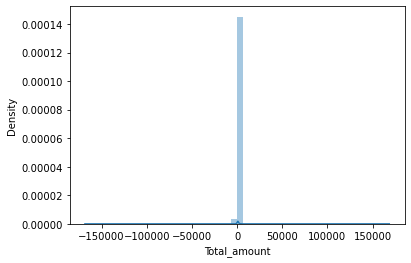

In [29]:
sns.distplot( market_df['Total_amount'])

### Top ten Selling Items

In [30]:
## number of unique items
market_df.Description.nunique()

3885

<AxesSubplot:>

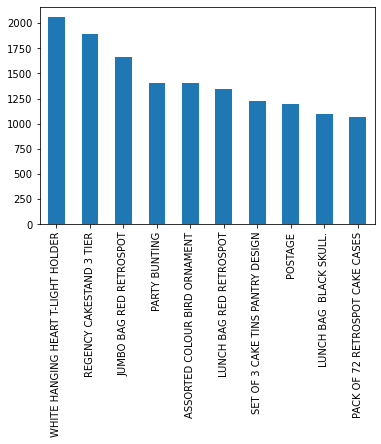

In [31]:
market_df.Description.value_counts(ascending=False).head(10).plot(kind='bar')

In [32]:
country= market_df.groupby('Country')['Total_amount'].sum().reset_index()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United Kingdom'),
  Text(1, 0, 'Netherlands'),
  Text(2, 0, 'EIRE'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Australia'),
  Text(6, 0, 'Switzerland'),
  Text(7, 0, 'Spain'),
  Text(8, 0, 'Belgium'),
  Text(9, 0, 'Sweden')])

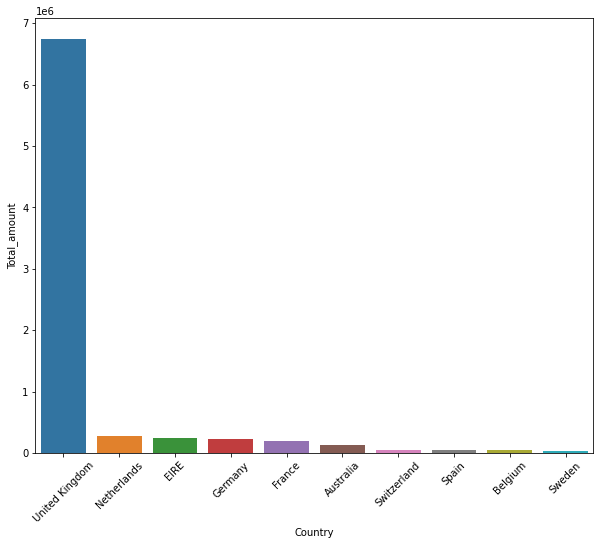

In [33]:
plt.figure(figsize=(10,8))
sns.barplot(data= country.sort_values('Total_amount', ascending=False).head(10), x='Country', y='Total_amount')
plt.xticks(rotation=45)

#### United Kingdom has the higest transaction. Hence finding most frequenct products combination using Apriori

In [36]:
market_UK = market_df[market_df['Country'] =="United Kingdom"].groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')


In [37]:
market_UK.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


To make use of the apriori module given by mlxtend library, we need to convert the dataset according to it’s liking. apriori module requires a dataframe that has either 0 and 1 or True and False as data. The data we have is all string (name of items), we need to One Hot Encode the data.

In [38]:
def encode(x):
    if x>=1:
        return 1 
    else:
        return 0 

In [39]:
market_UK= market_UK.applymap(encode)

In [2]:
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
freqitems1 = apriori(market_UK, min_support = 0.01, use_colnames = True, max_len = 2)
  
freqitems1.head()

/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
rules1 = association_rules(freqitems1, metric ="lift", min_threshold = 1)
rules1 = rules1.sort_values(['confidence', 'lift'], ascending =[False, False])
rules1.head()

In UK, we can see that different types of cups are bought together. This makes sense because of their royal culture. 

## RFM Analysis

In [34]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

#### Frequency

In [35]:
frequency= market_df.groupby('CustomerID')['InvoiceNo'].count()

In [36]:
frequency= frequency.reset_index()

In [37]:
frequency.rename(columns= {'InvoiceNo': 'Frequency'}, inplace=True)

In [38]:
frequency.sort_values('Frequency', ascending=False).head(10)

,CustomerID,Frequency
4042,17841.0,7812
1895,14911.0,5898
1300,14096.0,5128
330,12748.0,4459
1674,14606.0,2759
2192,15311.0,2478
1703,14646.0,2085
568,13089.0,1853
698,13263.0,1667
1447,14298.0,1640


### Recency

In [39]:
market_df['diff'] = max(market_df['InvoiceDate'])- market_df['InvoiceDate']

In [40]:
recency= market_df.groupby('CustomerID')['diff'].min()

In [41]:
recency= recency.reset_index()

In [42]:
recency['diff']= recency['diff'].dt.days


In [43]:
recency.rename(columns={'diff':'Recency'}, inplace=True)

In [44]:
recency.head(10)

,CustomerID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
5,12352.0,35
6,12353.0,203
7,12354.0,231
8,12355.0,213
9,12356.0,22


### Monetary

In [45]:
monetary= market_df.groupby('CustomerID')['Total_amount'].sum()

In [46]:
monetary= monetary.reset_index()

In [47]:
monetary.rename(columns={'Total_amount':'Monetary'}, inplace=True)

In [48]:
monetary.head(10)

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
5,12352.0,1545.41
6,12353.0,89.00
7,12354.0,1079.40
8,12355.0,459.40
9,12356.0,2811.43


### Merging all three df for RMF Analysis

In [49]:
rfm= recency.merge(frequency, on='CustomerID', how='inner')

In [50]:
rfm= rfm.merge(monetary, on='CustomerID', how='inner')

In [51]:
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,2,0.00
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40
...,...,...,...,...
4367,18280.0,277,10,180.60
4368,18281.0,180,7,80.82
4369,18282.0,7,13,176.60
4370,18283.0,3,721,2045.53


### Checking the distributiong for R,F and M

<AxesSubplot:>

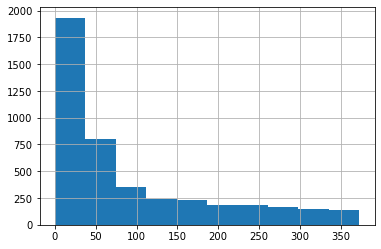

In [52]:
rfm['Recency'].hist()

<AxesSubplot:>

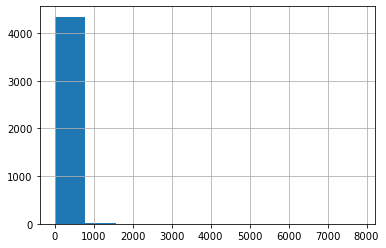

In [53]:
rfm['Frequency'].hist(bins=10)

<AxesSubplot:>

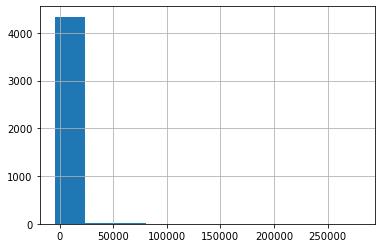

In [54]:
rfm['Monetary'].hist(bins=10)

### Scaling the data for Cluster Analysis

In [55]:
scaler= MinMaxScaler()

In [56]:
rfm_scaled= rfm[['Recency','Frequency','Monetary']]

In [57]:
rfm_scaled= scaler.fit_transform(rfm_scaled)

In [58]:
rfm_scaled= pd.DataFrame(rfm_scaled, columns=['Recency','Frequency','Monetary'])
rfm_scaled.head()

,Recency,Frequency,Monetary
0,0.871314,0.000128,0.015109
1,0.002681,0.023172,0.030297
2,0.198391,0.003841,0.021442
3,0.048257,0.009218,0.021303
4,0.828418,0.002048,0.016288


<AxesSubplot:>

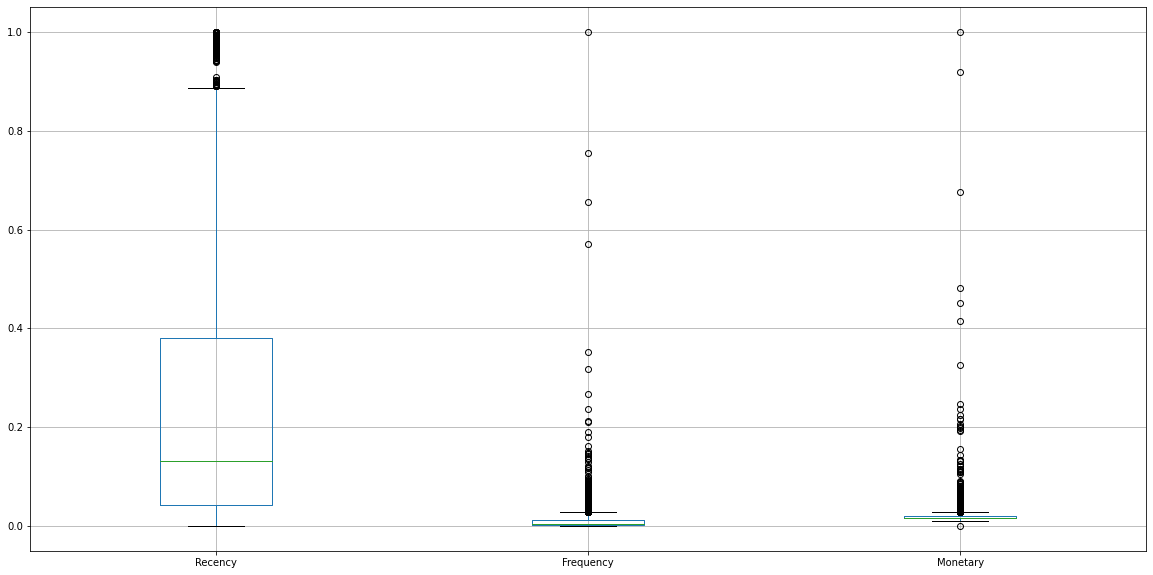

In [59]:
plt.figure(figsize=(20,10))
rfm_scaled.boxplot()

### Clustering

In [60]:
from sklearn.cluster import KMeans

In [61]:
kmeans= KMeans(n_clusters= 4, max_iter= 70)

In [62]:
kmeans.fit(rfm_scaled)

KMeans(max_iter=70, n_clusters=4)

In [63]:
variance= []
val= [2,3,4,5,6,7]
for i in val:
    kmeans= KMeans(n_clusters= i, max_iter= 70)
    kmeans.fit(rfm_scaled)
    variance.append(kmeans.inertia_)

In [64]:
variance

[72.84591826827025,
 38.23961068178938,
 24.75368461253523,
 18.010350200616713,
 14.601549437446241,
 11.298533054689873]

### Silhouette Analysis

In [65]:
for i in val:
    kmeans= KMeans(n_clusters= i, max_iter= 70)
    kmeans.fit(rfm_scaled)
    label= kmeans.labels_
    silhouette_avg= silhouette_score(rfm_scaled, label)
    print('when cluster is {0} then silhouette score is {1}'.format(i,silhouette_avg))

when cluster is 2 then silhouette score is 0.7276928370366591
when cluster is 3 then silhouette score is 0.6569108485288879
when cluster is 4 then silhouette score is 0.5793689980241765
when cluster is 5 then silhouette score is 0.5680935445169649
when cluster is 6 then silhouette score is 0.5539038476766718
when cluster is 7 then silhouette score is 0.5649139020592303


In [66]:
## Based on above score we are selecting model with cluster= 3

In [67]:
kmeans= KMeans(n_clusters= 3, max_iter= 70)
kmeans.fit(rfm_scaled)

KMeans(max_iter=70, n_clusters=3)

In [68]:
rfm_scaled['CustomerID'] = rfm['CustomerID']

In [69]:
rfm_scaled.head()

,Recency,Frequency,Monetary,CustomerID
0,0.871314,0.000128,0.015109,12346.0
1,0.002681,0.023172,0.030297,12347.0
2,0.198391,0.003841,0.021442,12348.0
3,0.048257,0.009218,0.021303,12349.0
4,0.828418,0.002048,0.016288,12350.0


In [70]:
rfm_scaled['label']= kmeans.labels_

In [71]:
rfm_scaled.head()

,Recency,Frequency,Monetary,CustomerID,label
0,0.871314,0.000128,0.015109,12346.0,1
1,0.002681,0.023172,0.030297,12347.0,2
2,0.198391,0.003841,0.021442,12348.0,2
3,0.048257,0.009218,0.021303,12349.0,2
4,0.828418,0.002048,0.016288,12350.0,1


<AxesSubplot:xlabel='label', ylabel='count'>

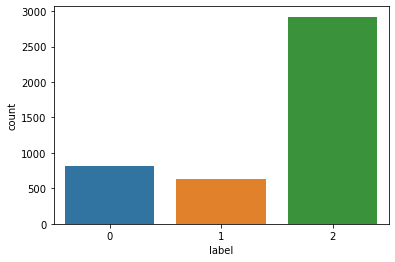

In [72]:
sns.countplot(data= rfm_scaled, x='label')

<AxesSubplot:xlabel='label', ylabel='Monetary'>

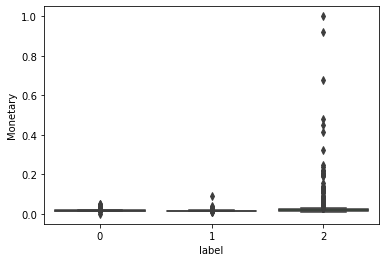

In [73]:
sns.boxplot(data= rfm_scaled, x='label', y='Monetary') # which cluster spent more

<AxesSubplot:xlabel='label', ylabel='Recency'>

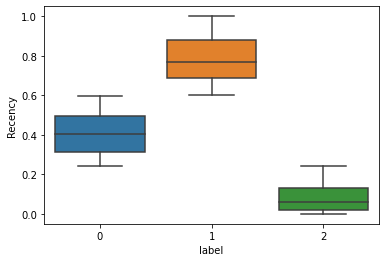

In [74]:
sns.boxplot(data= rfm_scaled, x='label', y='Recency') # which cluster is more recent

<AxesSubplot:xlabel='label', ylabel='Frequency'>

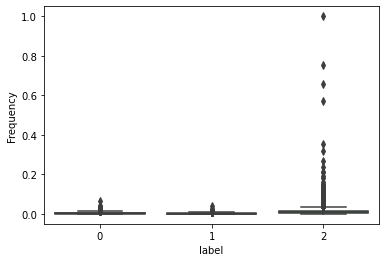

In [75]:
sns.boxplot(data= rfm_scaled, x='label', y='Frequency') # which cluster is more frequent

<AxesSubplot:xlabel='Recency', ylabel='Monetary'>

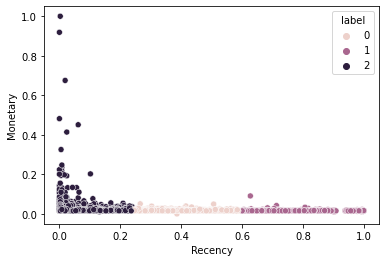

In [76]:
sns.scatterplot(data= rfm_scaled, x='Recency', y='Monetary', hue='label') 
# dark purple group purchased spent more and has bought products recently

<AxesSubplot:xlabel='Recency', ylabel='Frequency'>

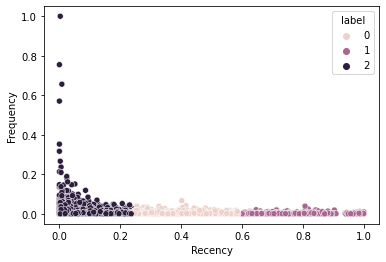

In [77]:
sns.scatterplot(data= rfm_scaled, x='Recency', y='Frequency', hue='label')
# dark purple group purchased products frequently and has bought products recently

<AxesSubplot:xlabel='Monetary', ylabel='Frequency'>

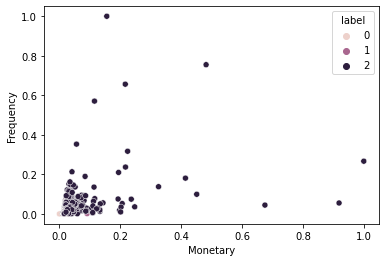

In [78]:
sns.scatterplot(data= rfm_scaled, x='Monetary', y='Frequency', hue='label')
# dark purple group purchased products frequently and has spent more